# Challenge

Do a little scraping or API-calling of your own.  Pick a new website and see what you can get out of it.  Expect that you'll run into bugs and blind alleys, and rely on your mentor to help you get through.  

Formally, your goal is to write a scraper that will:

1) Return specific pieces of information (rather than just downloading a whole page)  
2) Iterate over multiple pages/queries  
3) Save the data to your computer  

Once you have your data, compute some statistical summaries and/or visualizations that give you some new insights into your scraping topic of interest.  Write up a report from scraping code to summary and share it with your mentor.

# Background

I decided to scrape the NASA Exoplanet Archive (https://exoplanetarchive.ipac.caltech.edu/index.html), which is a catalog of astronomical data on exoplanets and their host stars. The data includes stellar parameters, exoplanet parameters, and discovery/characterization data.

For this challenge, I chose to return the following pieces of information:

* pl_name = planet name
* pl_discmethod = discovery method
* pl.orbper = orbital period (time the planet takes to make a complete orbit around its host star)
* pl_radj = planet radius in Jupiter radii
* pl_facility = discovery facility

Since the NASA API is able to access the entire archive, I did not have to iterate over multiple pages or queries to return the data of interest.

# Scrape and Save Data

In [1]:
# Get data of interest
import requests

r = requests.get('https://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI?table=exoplanets&select=pl_name,pl_discmethod,pl_orbper,pl_radj,pl_facility&format=json')

In [2]:
# Save data of interest as a json file
import json

data = r.json()

with open('exoplanets.json', 'w') as json_file:
    json.dump(data, json_file)

In [3]:
# Load json file into a pandas data frame
import pandas as pd

exoplanets = pd.read_json('exoplanets.json')

# Print shape and first 5 entries of resulting data frame
print(exoplanets.shape)
print(exoplanets.head())

(4135, 5)
        pl_name pl_discmethod  pl_orbper  pl_radj pl_facility
0  Kepler-150 d       Transit  12.560930    0.249      Kepler
1  Kepler-150 e       Transit  30.826557    0.278      Kepler
2  Kepler-151 b       Transit  15.228958    0.273      Kepler
3  Kepler-151 c       Transit  24.674612    0.186      Kepler
4  Kepler-152 b       Transit  18.207973    0.249      Kepler


# Clean Data

In [4]:
# Count number of missing values in each column
exoplanets.isnull().sum()

pl_name            0
pl_discmethod      0
pl_orbper        120
pl_radj          962
pl_facility        0
dtype: int64

In [5]:
# Remove entries with missing values
exoplanets.dropna(inplace=True)

In [6]:
# Confirm that entries with missing values were removed
exoplanets.isnull().sum()

pl_name          0
pl_discmethod    0
pl_orbper        0
pl_radj          0
pl_facility      0
dtype: int64

In [15]:
print(exoplanets.shape)

(3162, 5)


# Analyze Data

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

## Which discovery method is the most common?

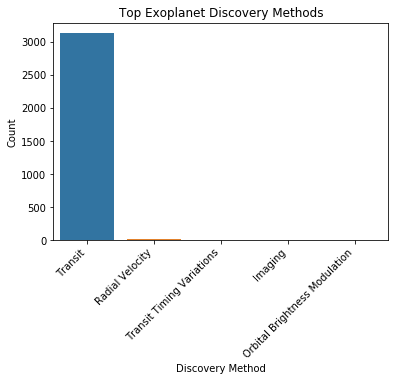

In [8]:
# Plot frequency of discovery methods in descending order
chart = sns.countplot(x='pl_discmethod',
                      data=exoplanets,
                      order=exoplanets['pl_discmethod'].value_counts().index)

chart.set_xticklabels(chart.get_xticklabels(),
                      rotation=45, horizontalalignment='right')

chart.set_title('Top Exoplanet Discovery Methods')
chart.set_xlabel('Discovery Method')
chart.set_ylabel('Count')

plt.show()

The most common discovery method by far is Transit, which means astronomers discovered the exoplanet by measuring a decrease in light from a star as the planet crossed between the star and the observer (typically a telescope).

## Which facility has discovered the most exoplanets?

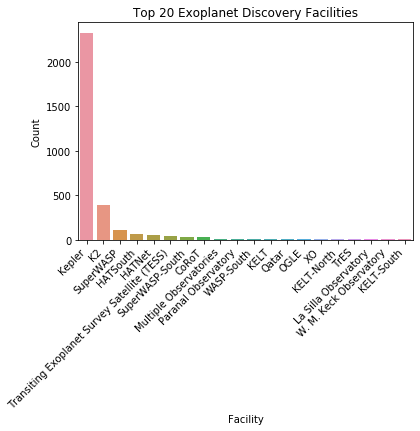

In [9]:
# Plot frequency of facilities in descending order
chart = sns.countplot(x='pl_facility',
                      data=exoplanets,
                      order=exoplanets['pl_facility'].value_counts().iloc[:20].index)

chart.set_xticklabels(chart.get_xticklabels(),
                      rotation=45, horizontalalignment='right')

chart.set_title('Top 20 Exoplanet Discovery Facilities')
chart.set_xlabel('Facility')
chart.set_ylabel('Count')

plt.show()

The Kepler space telescope has discovered the most exoplanets of all the facilities. K2, which uses spacecraft origininally designed and launched for the Kepler mission, has discovered the second most.

## Which explanet is most similar to Earth in terms of orbital period and radius?

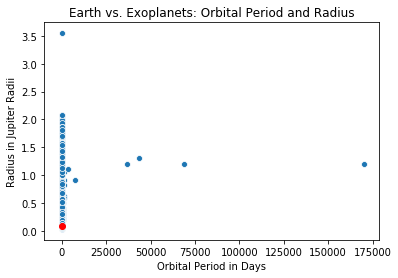

In [16]:
# Plot orbital period vs. radius
chart = sns.scatterplot(x='pl_orbper',
                        y='pl_radj',
                        data=exoplanets)

# Add Earth to plot
plt.scatter(x=365, y=0.0892147, color='r')

chart.set_title('Earth vs. Exoplanets: Orbital Period and Radius')
chart.set_xlabel('Orbital Period in Days')
chart.set_ylabel('Radius in Jupiter Radii')

plt.show()

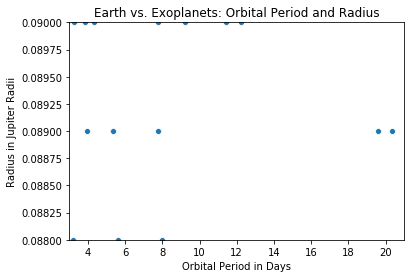

In [10]:
# Plot orbital period vs. radius
chart = sns.scatterplot(x='pl_orbper',
                        y='pl_radj',
                        data=exoplanets)

# Add Earth to plot
plt.scatter(x=365, y=0.0892147, color='r')

# Set axis limits
plt.ylim(0.088, 0.09)
plt.xlim(3, 21)

chart.set_title('Earth vs. Exoplanets: Orbital Period and Radius')
chart.set_xlabel('Orbital Period in Days')
chart.set_ylabel('Radius in Jupiter Radii')

plt.show()

In [11]:
exoplanets.loc[(exoplanets['pl_radj'] > 0.088) & (exoplanets['pl_radj'] < 0.09)]

,pl_name,pl_discmethod,pl_orbper,pl_radj,pl_facility
950,Kepler-20 f,Transit,19.577585,0.089,Kepler
1910,Kepler-1417 b,Transit,20.350521,0.089,Kepler
2566,Kepler-392 b,Transit,5.341853,0.089,Kepler
3296,Kepler-1464 c,Transit,5.327863,0.089,Kepler
3886,K2-239 c,Transit,7.775000,0.089,K2
4078,EPIC 201833600 c,Transit,3.961510,0.089,K2


There are six exoplanets with a radius similar to that of planet Earth. Of these six exoplanets, Kepler-1417 b has the orbital period closest to that of planet Earth.

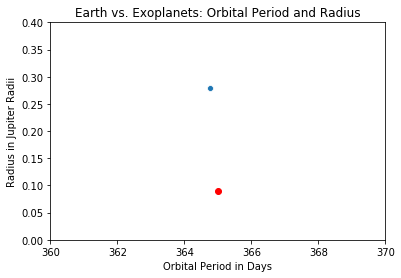

In [17]:
# Plot orbital period vs. radius
chart = sns.scatterplot(x='pl_orbper',
                        y='pl_radj',
                        data=exoplanets)

# Add Earth to plot
plt.scatter(x=365, y=0.0892147, color='r')
plt.xlim(360, 370)
plt.ylim(0, 0.4)

chart.set_title('Earth vs. Exoplanets: Orbital Period and Radius')
chart.set_xlabel('Orbital Period in Days')
chart.set_ylabel('Radius in Jupiter Radii')

plt.show()

In [13]:
exoplanets.loc[(exoplanets['pl_orbper'] > 360) & (exoplanets['pl_orbper'] < 370)]

,pl_name,pl_discmethod,pl_orbper,pl_radj,pl_facility
3580,Kepler-1536 b,Transit,364.758031,0.28,Kepler


Only one exoplanet, Kepler-1536 b, has an orbital period within 5 days of that of planet Earth. However, this exoplanet has a much larger radius than planet Earth.

# Summary

In summary, the transit method is the most common discovery method for exoplanets, with Kepler and K2 discovering the most. Although nearly 3162 exoplanets have been entered into the NASA Exoplanet Archive and have orbital period and radius data, none of the exoplanets are extremely similar to planet Earth in terms of both measures. That being said, Kepler-1536 b appears to be the most similar, having a similar orbital period but a larger radius.